In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import random
random.seed(100)
import warnings
warnings.filterwarnings("ignore")

# Dataset:
The dataset that used in this system were collected from several website like *buddy4study.com scholarships.gov.in* and the data was under the process of augmentation and data validation.

In [3]:
df=pd.read_csv("dataset/dataset_revised.csv")
df.head()

,Name,Education Qualification,Gender,Community,Religion,Exservice-men,Disability,Sports,Annual-Percentage,Income,India,Outcome
0,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Hindu,Yes,Yes,Yes,90-100,Upto 1.5L,In,1
1,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Hindu,Yes,Yes,No,90-100,Upto 1.5L,In,1
2,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Muslim,Yes,Yes,Yes,90-100,Upto 1.5L,In,1
3,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Muslim,Yes,Yes,No,90-100,Upto 1.5L,In,1
4,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Chirstian,Yes,Yes,Yes,90-100,Upto 1.5L,In,1


In [4]:
cols = list(df.columns.values)
cols

['Name',
 'Education Qualification',
 'Gender',
 'Community',
 'Religion',
 'Exservice-men',
 'Disability',
 'Sports',
 'Annual-Percentage',
 'Income',
 'India',
 'Outcome']

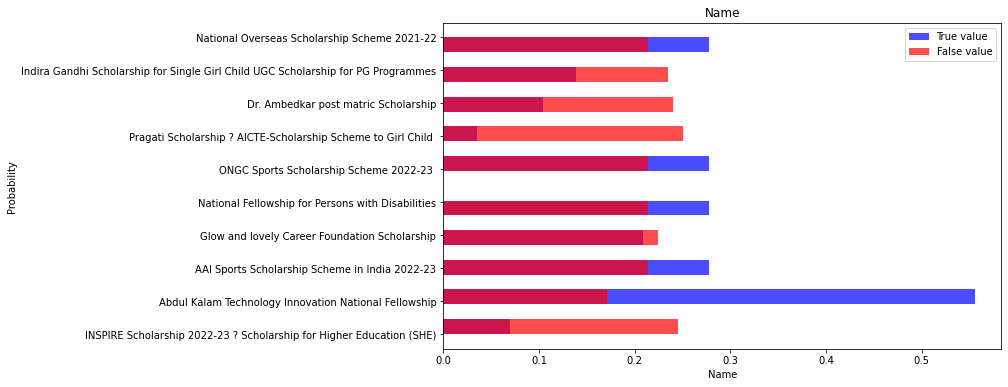

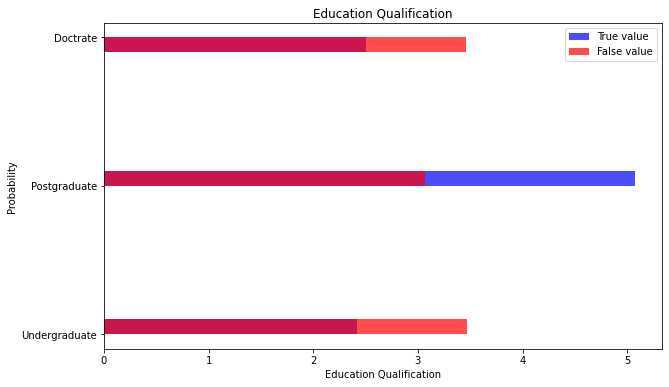

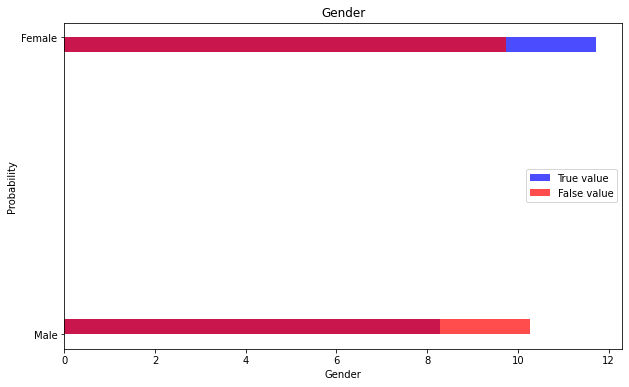

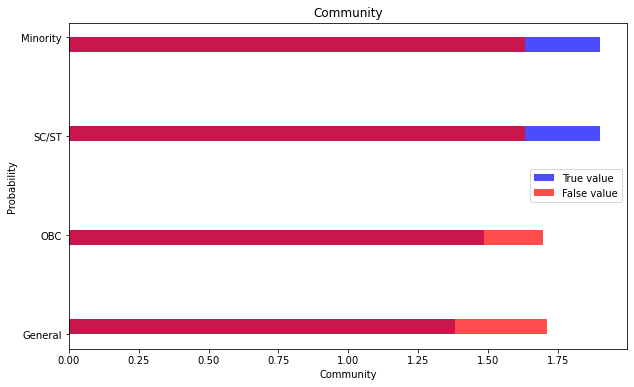

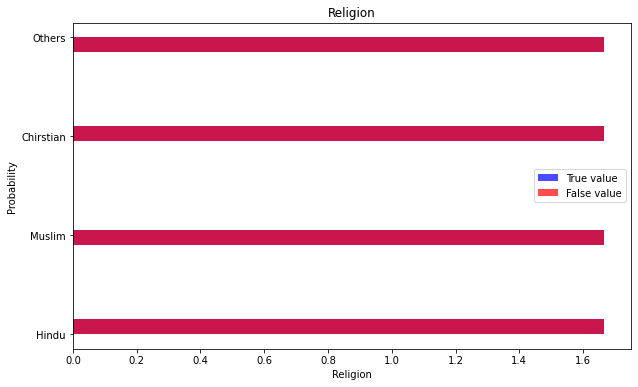

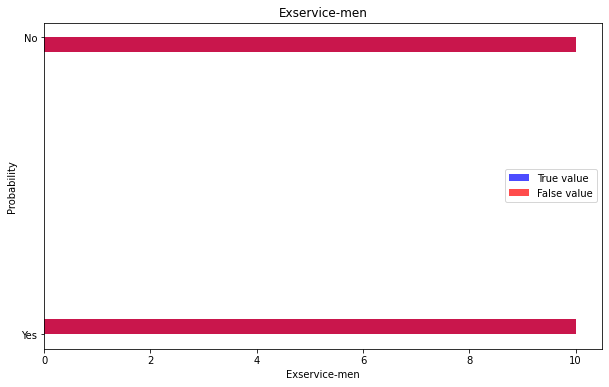

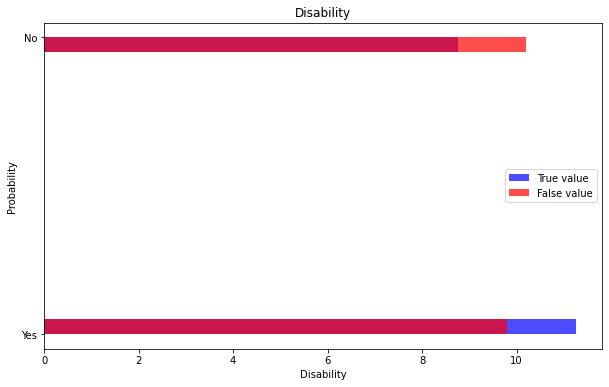

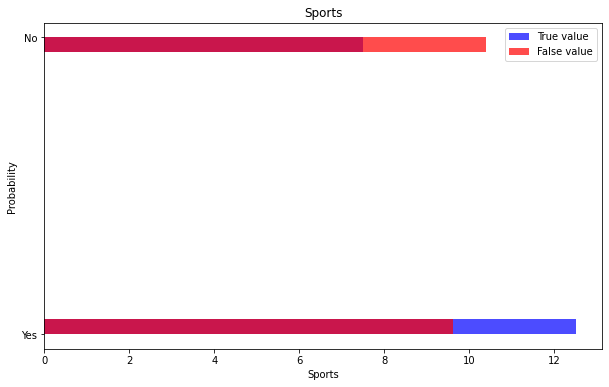

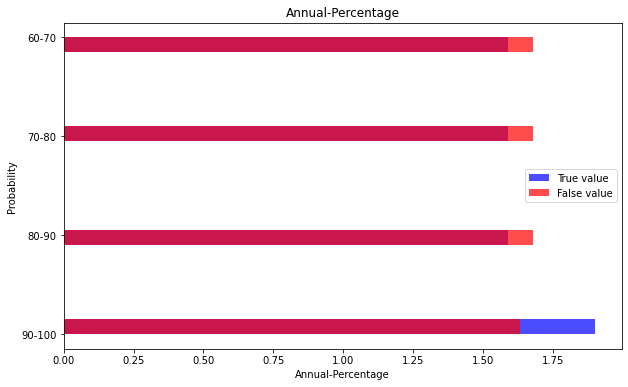

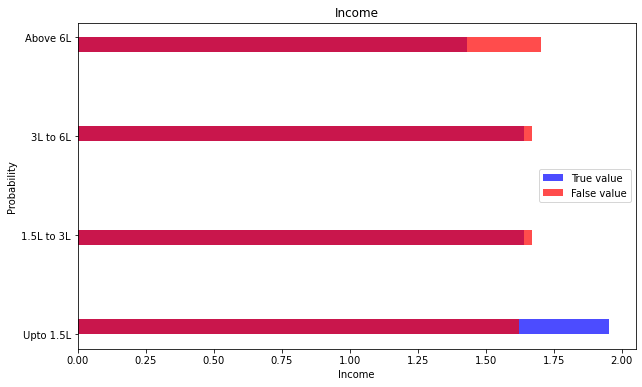

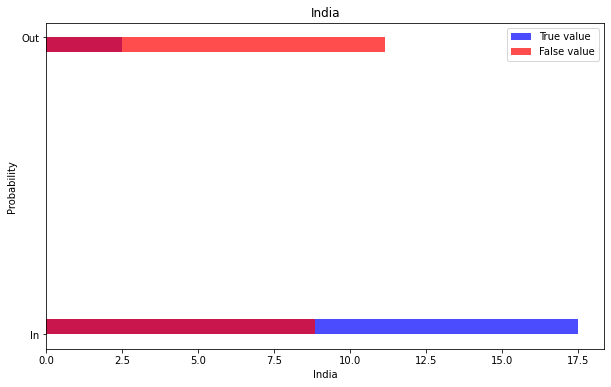

In [5]:
for label in cols[:-1]:
  plt.figure(figsize=(10,6))
  plt.hist(df[df["Outcome"]==1][label],bins=20, color='blue', label='True value', alpha=0.7, density=True,orientation='horizontal')
  plt.hist(df[df["Outcome"]==0][label],bins=20, color='red', label='False value', alpha=0.7, density=True,orientation='horizontal')
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [6]:
qualification_map={"Undergraduate":0,"Postgraduate":1,"Doctrate":2}
gender_map = {"Male":1,"Female":0}
community_map = {"SC/ST":0,"OBC":1,"General":2,"Minority":3}
annual_percentage_map = {"90-100":0,"80-90":1,"70-80":2,"60-70":3}
income_map = {"Upto 1.5L":0,"1.5L to 3L":1,"3L to 6L":2,"Above 6L":3}
india_map= {"In":0,"Out":1}
religion_map = {"Hindu":0,"Muslim":1,"Chirstian":2,"Others":3}
exservice_map={"Yes":1,"No":0}
disability_map={"Yes":1,"No":0}
sports_map={"Yes":1,"No":0}
scholarship_map = {'INSPIRE Scholarship 2022-23 ? Scholarship for Higher Education (SHE)':0,
       'Abdul Kalam Technology Innovation National Fellowship':1,
       'AAI Sports Scholarship Scheme in India 2022-23':2,
       'Glow and lovely Career Foundation Scholarship':3,
       'National Fellowship for Persons with Disabilities':4,
       'ONGC Sports Scholarship Scheme 2022-23 ':5,
       'Pragati Scholarship ? AICTE-Scholarship Scheme to Girl Child ':6,
       'Dr. Ambedkar post matric Scholarship':7,
       'Indira Gandhi Scholarship for Single Girl Child UGC Scholarship for PG Programmes':8,
       'National Overseas Scholarship Scheme 2021-22':9}

In [7]:
df2 = df.copy()

df2["Education Qualification"]=df2["Education Qualification"].map(qualification_map)
df2["Gender"]=df2["Gender"].map(gender_map)
df2["Community"]=df2["Community"].map(community_map)
df2["Annual-Percentage"]=df2["Annual-Percentage"].map(annual_percentage_map)
df2["Income"]=df2["Income"].map(income_map)
df2["Religion"]=df2["Religion"].map(religion_map)
df2["India"]=df2["India"].map(india_map)
df2["Exservice-men"]=df2["Exservice-men"].map(exservice_map)
df2["Disability"]=df2["Disability"].map(disability_map)
df2["Sports"]=df2["Sports"].map(sports_map)
df2["Name"]=df["Name"].map(scholarship_map)



In [8]:
df2.head()

,Name,Education Qualification,Gender,Community,Religion,Exservice-men,Disability,Sports,Annual-Percentage,Income,India,Outcome
0,0,0,1,2,0,1,1,1,0,0,0,1
1,0,0,1,2,0,1,1,0,0,0,0,1
2,0,0,1,2,1,1,1,1,0,0,0,1
3,0,0,1,2,1,1,1,0,0,0,0,1
4,0,0,1,2,2,1,1,1,0,0,0,1


In [9]:
df2['Name'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
df2.to_csv("dataset/labeled.csv",index=False)

In [12]:
df2.shape

(245760, 12)

# Correlation Plot

<AxesSubplot:>

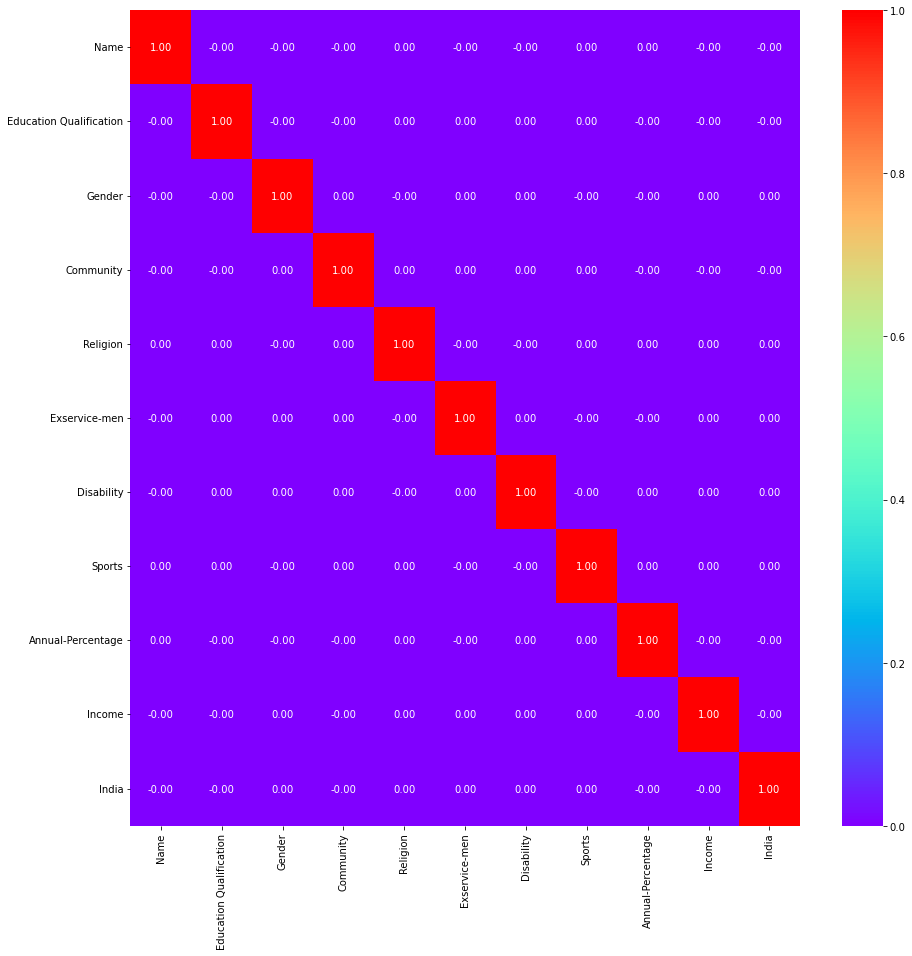

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.drop(columns=["Outcome"]).corr(),cmap="rainbow",fmt=".2f",annot=True)

# Train/valid/test dataset

In [14]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import log_loss

In [15]:
train, valid, test = np.split(df2.sample(frac=1), [int(0.6*len(df2)), int(0.8*len(df2))])

In [16]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y



def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


In [17]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# kNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

0.19826253255208334

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.87     42551
           1       0.39      0.82      0.52      6601

    accuracy                           0.80     49152
   macro avg       0.68      0.81      0.70     49152
weighted avg       0.89      0.80      0.83     49152



# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [24]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.58      0.73     42551
           1       0.24      0.87      0.38      6601

    accuracy                           0.62     49152
   macro avg       0.61      0.73      0.55     49152
weighted avg       0.87      0.62      0.68     49152



In [25]:
mean_absolute_error(y_test, y_pred)

0.3795979817708333

# Log Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [28]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.60      0.74     42551
           1       0.25      0.86      0.39      6601

    accuracy                           0.64     49152
   macro avg       0.61      0.73      0.57     49152
weighted avg       0.87      0.64      0.70     49152



In [29]:
mean_absolute_error(y_test, y_pred)

0.3608194986979167

# SVM

In [71]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86     45536
           1       0.24      0.95      0.38      3616

    accuracy                           0.77     49152
   macro avg       0.62      0.86      0.62     49152
weighted avg       0.94      0.77      0.83     49152



# XGBoost Classifier

In [30]:
from sklearn.metrics import r2_score,mean_squared_error
def check_test_score(model):
    y_pred=model.predict(X_test)
    print("R2 score is:", r2_score(y_test,y_pred))
    print("The mean squared error is :",mean_squared_error(y_test,y_pred))
    print("The mean absolute error is :",mean_absolute_error(y_test, y_pred))

In [31]:
from xgboost import XGBRegressor,XGBClassifier

In [32]:
xgb = XGBClassifier(random_state = 42, learning_rate=0.02, n_estimators=300)
xgb = xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)

In [33]:
check_test_score(xgb)

R2 score is: 0.9746259557727017
The mean squared error is : 0.0029500325520833335
The mean absolute error is : 0.0029500325520833335


In [34]:
mean_absolute_error(y_test, xgb_y_pred)

0.0029500325520833335

# CatBoost Regressor

In [36]:
from catboost import CatBoostRegressor

In [37]:
cat_boost=CatBoostRegressor()
cat_boost.fit(X_train,y_train)

Learning rate set to 0.098308
0:	learn: 0.4725637	total: 121ms	remaining: 2m 1s
1:	learn: 0.4490208	total: 187ms	remaining: 1m 33s
2:	learn: 0.4297817	total: 264ms	remaining: 1m 27s
3:	learn: 0.4109748	total: 357ms	remaining: 1m 29s
4:	learn: 0.3956680	total: 429ms	remaining: 1m 25s
5:	learn: 0.3817570	total: 512ms	remaining: 1m 24s
6:	learn: 0.3705697	total: 603ms	remaining: 1m 25s
7:	learn: 0.3579413	total: 681ms	remaining: 1m 24s
8:	learn: 0.3474249	total: 745ms	remaining: 1m 22s
9:	learn: 0.3397536	total: 798ms	remaining: 1m 19s
10:	learn: 0.3312354	total: 864ms	remaining: 1m 17s
11:	learn: 0.3242633	total: 931ms	remaining: 1m 16s
12:	learn: 0.3188079	total: 981ms	remaining: 1m 14s
13:	learn: 0.3128650	total: 1.03s	remaining: 1m 12s
14:	learn: 0.3079625	total: 1.09s	remaining: 1m 11s
15:	learn: 0.3033242	total: 1.16s	remaining: 1m 11s
16:	learn: 0.2984925	total: 1.21s	remaining: 1m 9s
17:	learn: 0.2941979	total: 1.26s	remaining: 1m 8s
18:	learn: 0.2896672	total: 1.31s	remaining: 1m

In [38]:
check_test_score(cat_boost)

R2 score is: 0.9993125632301397
The mean squared error is : 7.992264971325349e-05
The mean absolute error is : 0.004402610735261892


# RandomForest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [40]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [42]:
check_test_score(rf)

R2 score is: 1.0
The mean squared error is : 0.0
The mean absolute error is : 0.0


# DecisionTree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [45]:
check_test_score(dt)

R2 score is: 1.0
The mean squared error is : 0.0
The mean absolute error is : 0.0


In [46]:
acc = (83,60,71,87,97,99,42,23)
loss = (16,40,29,13,3,1,47,53)
name = ("kNN","Naive","Log","SVM","Xgb","CatBoost","RandomForest","DecisionTree")

In [47]:
xpos = np.arange(len(acc))
xpos

array([0, 1, 2, 3, 4, 5, 6, 7])

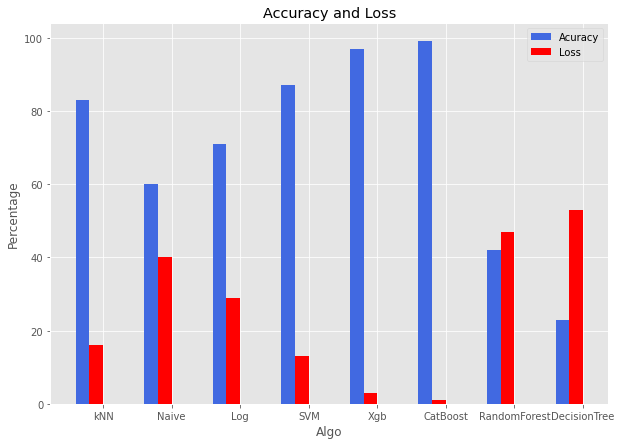

In [48]:
style.use('ggplot')
plt.figure(figsize=(10,7))
barWidth = 0.2
plt.bar(xpos, acc, color='royalblue', width = barWidth, label='Acuracy')
plt.bar(xpos+0.2, loss, color='red', width = barWidth, label='Loss')
plt.xticks(xpos+0.3, name)
plt.xlabel('Algo')
plt.ylabel('Percentage')
plt.title('Accuracy and Loss')
plt.legend()

# Fit model

In [49]:
import sklearn

X = df2[df2.columns[:-1]].values
y = df2[df2.columns[-1]].values
sc=StandardScaler()
X=sc.fit_transform(X)

In [50]:
model=CatBoostRegressor()

In [51]:
model.fit(X,y)

Learning rate set to 0.097697
0:	learn: 0.3270045	total: 43.2ms	remaining: 43.1s
1:	learn: 0.3174583	total: 83.3ms	remaining: 41.6s
2:	learn: 0.3070905	total: 122ms	remaining: 40.6s
3:	learn: 0.2982689	total: 162ms	remaining: 40.3s
4:	learn: 0.2915073	total: 204ms	remaining: 40.6s
5:	learn: 0.2836698	total: 241ms	remaining: 40s
6:	learn: 0.2777037	total: 279ms	remaining: 39.5s
7:	learn: 0.2716670	total: 317ms	remaining: 39.3s
8:	learn: 0.2669849	total: 360ms	remaining: 39.7s
9:	learn: 0.2623004	total: 400ms	remaining: 39.6s
10:	learn: 0.2574091	total: 437ms	remaining: 39.3s
11:	learn: 0.2536004	total: 482ms	remaining: 39.7s
12:	learn: 0.2493925	total: 524ms	remaining: 39.8s
13:	learn: 0.2461041	total: 564ms	remaining: 39.7s
14:	learn: 0.2431580	total: 603ms	remaining: 39.6s
15:	learn: 0.2401964	total: 646ms	remaining: 39.7s
16:	learn: 0.2377276	total: 683ms	remaining: 39.5s
17:	learn: 0.2340227	total: 717ms	remaining: 39.1s
18:	learn: 0.2305991	total: 768ms	remaining: 39.7s
19:	learn: 

In [52]:
model.score(X_test,y_test)

0.9998001649344342

In [56]:
Pause=True
while Pause:
    values=[]
    a=input("Educational Qualification")
    values.append(qualification_map[a])
    a = input("Gender")
    values.append(gender_map[a])
    a = input("Community")
    values.append(community_map[a])
    a = input("Religion")
    values.append(religion_map[a])
    a = input("Exservice-men[Yes/No]")
    values.append(exservice_map[a])
    a = input("Disability[Yes/No]")
    values.append(disability_map[a])
    a = input("Sports[Yes/No]")
    values.append(sports_map[a])
    a = input("Annual Percentage")
    values.append(annual_percentage_map[a])
    a = input("Income")
    values.append(income_map[a])
    a = input("India/Abroad[In/Out]")
    values.append(india_map[a])
    Pause=False


In [57]:
from array import *
df=[]
df=values.copy()
scholarship=['INSPIRE Scholarship', 'National Fellowship Disabilities', 'Indira Gandhi Scholarship', 'Abdul Kalam Fellowship', 'AAI Sports Scholarship', 'Glow and lovely Scholarship', 'Dr. Ambedkar Scholarship', 'National Overseas Scholarship', 'Pragati Scholarship', 'ONGC Sports Scholarship']
arr=[]
for i in range(len(scholarship)):
  col = []
  col.append(i)
  for j in values:
    col.append(j)
  arr.append(col)



In [58]:
eligible_scholarship =[]

for i in range(len(scholarship)):
  val = sc.transform([arr[i]])
  output = model.predict(val).item()
  if(output>0):
    eligible_scholarship.append(scholarship[i])

print(eligible_scholarship)

['INSPIRE Scholarship', 'National Fellowship Disabilities', 'Indira Gandhi Scholarship', 'Glow and lovely Scholarship', 'National Overseas Scholarship']


In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('scholar.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('scholar.pkl','rb'))